In [ ]:
#importing libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras



In [ ]:
#Load the dataset
classNames=['cat','dog']
split=['train[:80%]','train[80%:]']
trainDataset,testDataset=tfds.load(name='cats_vs_dogs',split=split,as_supervised=True)

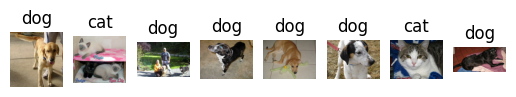

In [ ]:
i=0
fig,ax=plt.subplots(1,8)
for image,label in testDataset.take(8):
 ax[i].axis('off')
 ax[i].set_title(classNames[label])
 ax[i].imshow(image)
 i+=1

plt.show()#show the dataset


In [ ]:
#Preprocess the data
def preprocess(image,label):
  return tf.image.resize(image,[HEIGHT,WIDTH])/255,label

HEIGHT=200
WIDTH=200
split=['train[:80%]','train[80%:]']
trainDataset,testDataset=tfds.load(name='cats_vs_dogs',split=split,as_supervised=True)

trainDataset=trainDataset.map(preprocess).batch(32)
testDataset=testDataset.map(preprocess).batch(32)




In [ ]:
#Build Model
model=keras.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(HEIGHT,WIDTH,3)),#3 convolutional layers with 3 maxpooling layers
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(), 
    keras.layers.Dense(512,activation='relu'),#2 fully connected layers
    keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
model.summary()#summary of the model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)      

In [ ]:
#train the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])




In [ ]:
trainHistory=model.fit(trainDataset,epochs=50,validation_data=testDataset)

Epoch 1/50
582/582 [==============================] - 42s 68ms/step - loss: 0.6498 - accuracy: 0.6262 - val_loss: 0.5752 - val_accuracy: 0.6988
Epoch 2/50
582/582 [==============================] - 39s 67ms/step - loss: 0.5015 - accuracy: 0.7545 - val_loss: 0.5616 - val_accuracy: 0.7038
Epoch 3/50
582/582 [==============================] - 40s 68ms/step - loss: 0.3982 - accuracy: 0.8147 - val_loss: 0.5184 - val_accuracy: 0.7506
Epoch 4/50
582/582 [==============================] - 40s 69ms/step - loss: 0.2873 - accuracy: 0.8787 - val_loss: 0.5667 - val_accuracy: 0.7653
Epoch 5/50
582/582 [==============================] - 39s 66ms/step - loss: 0.1785 - accuracy: 0.9293 - val_loss: 0.7482 - val_accuracy: 0.7261
Epoch 6/50
582/582 [==============================] - 35s 60ms/step - loss: 0.1378 - accuracy: 0.9465 - val_loss: 0.9616 - val_accuracy: 0.7446
Epoch 7/50
582/582 [==============================] - 35s 60ms/step - loss: 0.0852 - accuracy: 0.9693 - val_loss: 1.0708 - val_accuracy:

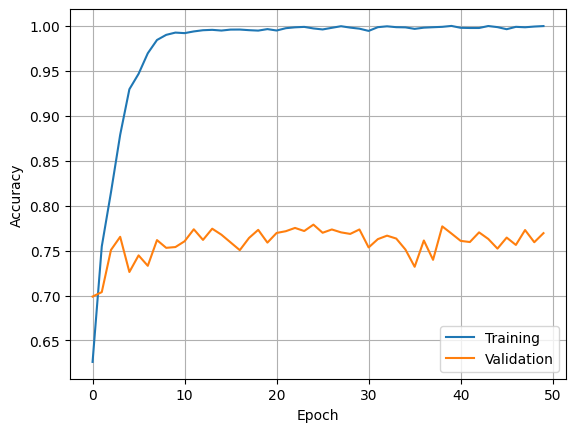

In [ ]:
plt.plot(trainHistory.history['accuracy']) #Visualise the data
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'])
plt.grid()
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
#Evaluate the model
(loss,accuracy)=model.evaluate(testDataset)
print('Loss:',loss)
print('Accuracy:',accuracy)

146/146 [==============================] - 7s 47ms/step - loss: 2.8846 - accuracy: 0.7693
Loss: 2.884601593017578
Accuracy: 0.7693465352058411


5/5 [==============================] - 0s 5ms/step


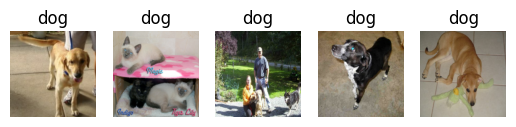

In [ ]:
#Test model
def preprocess(img, label):
  return tf.image.resize(img,[HEIGHT,WIDTH])/255, tf.cast(label, tf.float32)
HEIGHT=200
WIDTH=200
classNames = ['cat','dog']
split = ['train[:80%]','train[80%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs',split=split,as_supervised=True)#splitting the model
testDataset = testDataset.map(preprocess).batch(1)

model = keras.models.load_model('model.h5')#loading the trained model
predictions = model.predict(testDataset.take(5))

i=0
fig,ax=plt.subplots(1,5)#plotting 5 ssubplots in one grid
for image,_ in testDataset.take(5):#testing the model according to the validation data
  predictedLabel = int(predictions[i] >= 0.5)

  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[0])
  i+=1

plt.show()
